# Imbalance Data

In [1]:
import pandas as pd
import numpy  as np
import seaborn as SB
import matplotlib.pyplot as PLT
import scipy.stats as STATS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn import metrics
import random

In [2]:
n = 1000
skip = sorted(random.sample(range(1,319795),319795-n))
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv',skiprows=skip).reset_index().rename(columns={'index':'id'})

In [3]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']

In [4]:
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,75-79,No,No,23.73,No,No,Good,No,0.0,Yes,0.0,White,Male,Yes,6.0,No,No
1,75-79,No,No,23.63,No,No,Very good,No,0.0,Yes,0.0,White,Female,Yes,7.0,No,No
2,60-64,No,Yes,19.79,No,Yes,Poor,No,10.0,No,30.0,Black,Female,No,18.0,Yes,Yes
3,35-39,No,No,31.40,No,No,Very good,No,0.0,No,0.0,Black,Male,No,6.0,Yes,No
4,18-24,No,No,27.44,No,No,Good,No,30.0,Yes,0.0,White,Female,No,8.0,No,No


# <font color="Brown">BMI :</font>

In [5]:
X['BMI'].describe() 

count    1000.000000
mean       28.204100
std         6.582612
min        14.420000
25%        23.750000
50%        26.940000
75%        31.570000
max        75.420000
Name: BMI, dtype: float64

In [6]:
# normal range 10 ~ 50

In [7]:
X[X['BMI']<=50].groupby(['Sex'])['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,519.0,27.794085,6.305277,14.42,23.17,26.63,31.625,49.78
Male,473.0,28.122156,5.502283,14.60,24.39,26.96,31.190,48.73


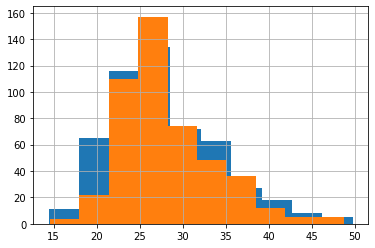

In [8]:
BMI_Normal_Range = X[X['BMI']<=50]
BMI_Normal_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

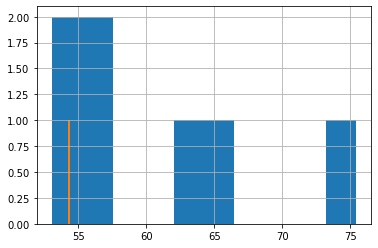

In [9]:
BMI_Out_Of_Range = X[X['BMI']>50]
BMI_Out_Of_Range.groupby(['Sex'])['BMI'].hist()
PLT.show()

In [10]:
# Drop rows with out of rage BMI
X = X.drop(BMI_Out_Of_Range.index,errors='ignore')

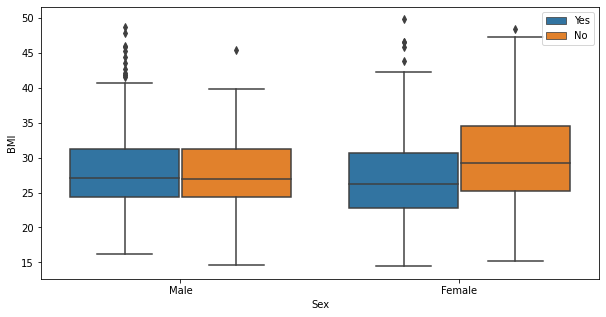

In [11]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=X['PhysicalActivity']).legend(loc='upper right')

# <font color="Brown">AlcoholDrinking :</font>

In [12]:
X['AlcoholDrinking'].describe()

count     992
unique      2
top        No
freq      937
Name: AlcoholDrinking, dtype: object

In [13]:
X['AlcoholDrinking'].value_counts()

No     937
Yes     55
Name: AlcoholDrinking, dtype: int64

# <font color="Brown">AgeCategory :</font>

In [14]:
X['AgeCategory'].describe()

count       992
unique       13
top       65-69
freq        106
Name: AgeCategory, dtype: object

In [15]:
X['AgeCategory'].value_counts()

65-69          106
60-64          105
70-74           95
55-59           89
75-79           74
45-49           74
50-54           72
35-39           69
18-24           69
40-44           66
30-34           61
80 or older     58
25-29           54
Name: AgeCategory, dtype: int64

In [16]:
_1 = X[X['AgeCategory']!='80 or older']['AgeCategory'].str.split('-').apply(
    lambda x : (int(x[0])+int(x[1]))/2
)
_2 = X[X['AgeCategory']=='80 or older']['AgeCategory'].str.split(' or ').apply(
    lambda x : 80
)
X.loc[_1.index,'AgeCategory'] = _1
X.loc[_2.index,'AgeCategory'] = _2
del _1,_2

In [17]:
X['AgeCategory'] = X['AgeCategory'].astype(np.int64) 

In [18]:
X['AgeCategory'].describe()

count    992.000000
mean      53.698589
std       17.739819
min       21.000000
25%       37.000000
50%       57.000000
75%       67.000000
max       80.000000
Name: AgeCategory, dtype: float64

<AxesSubplot:>

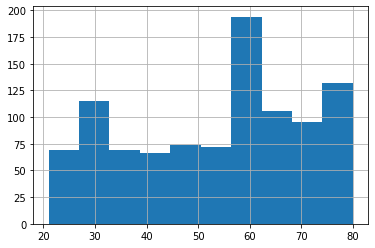

In [19]:
X['AgeCategory'].hist()

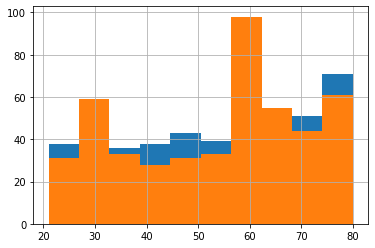

In [20]:
X.groupby(['Sex'])['AgeCategory'].hist()
PLT.show()

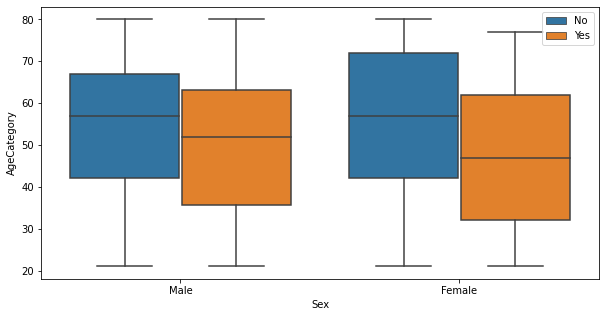

In [21]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Asthma']).legend(loc='upper right')

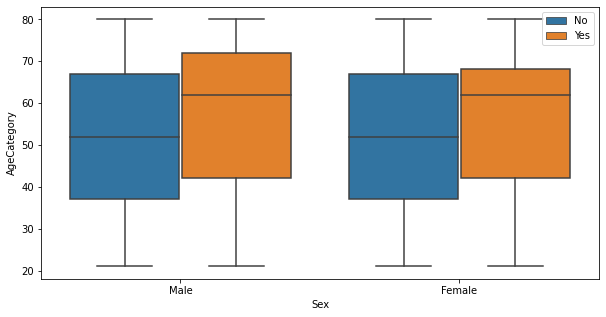

In [22]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Smoking']).legend(loc='upper right')

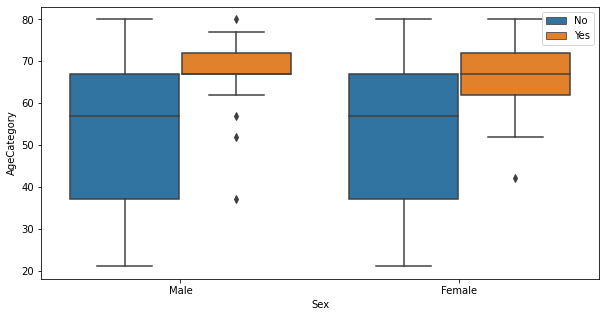

In [23]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['Stroke']).legend(loc='upper right')

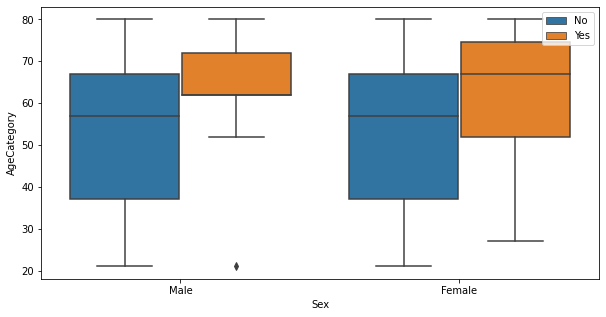

In [24]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=X['KidneyDisease']).legend(loc='upper right')

In [25]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime','AgeCategory'
]

# <font color="Brown">Asthma :</font>

In [26]:
DF['Asthma'].value_counts()

No     866
Yes    134
Name: Asthma, dtype: int64

In [27]:
DF['Asthma'].describe()

count     1000
unique       2
top         No
freq       866
Name: Asthma, dtype: object

In [28]:
DF['Asthma'].isnull().sum()

0

# <font color="Brown">Diabetic :</font>

In [29]:
X['Diabetic'].value_counts()

No                         837
Yes                        119
No, borderline diabetes     27
Yes (during pregnancy)       9
Name: Diabetic, dtype: int64

In [30]:
X['Diabetic'].isnull().sum()

0

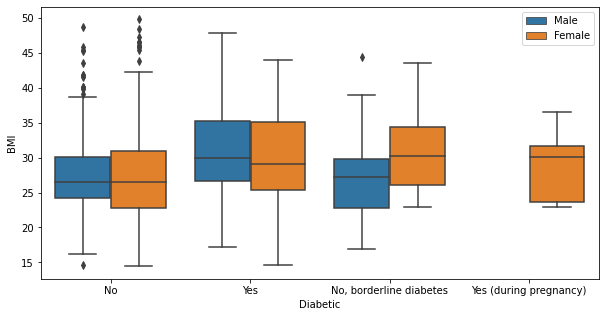

In [31]:
PLT.figure(figsize=(10,5))
SB.boxplot(x=X['Diabetic'],y=X['BMI'], hue=X['Sex']).legend(loc='upper right')

# <font color="Brown">DiffWalking :</font>

In [32]:
X['DiffWalking'].value_counts()

No     859
Yes    133
Name: DiffWalking, dtype: int64

In [33]:
X['DiffWalking'].isnull().sum()

0

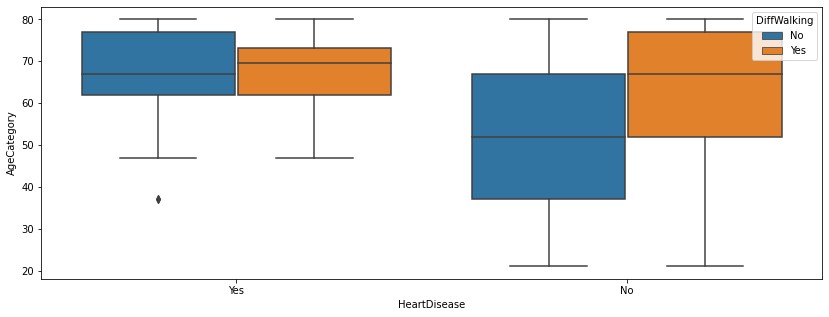

In [34]:
PLT.figure(figsize=(14,5))
SB.boxplot(x=Y,y=X['AgeCategory'], hue=X['DiffWalking']).legend(loc='upper right',title='DiffWalking')

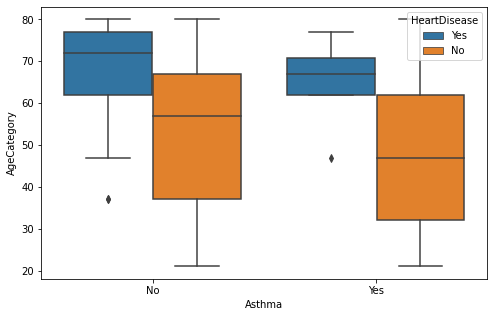

In [35]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['Asthma'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">GenHealth :</font>

In [36]:
X['GenHealth'].describe()

count           992
unique            5
top       Very good
freq            331
Name: GenHealth, dtype: object

In [37]:
X['GenHealth'].isnull().sum()

0

In [38]:
X['GenHealth'].value_counts()

Very good    331
Good         279
Excellent    238
Fair         106
Poor          38
Name: GenHealth, dtype: int64

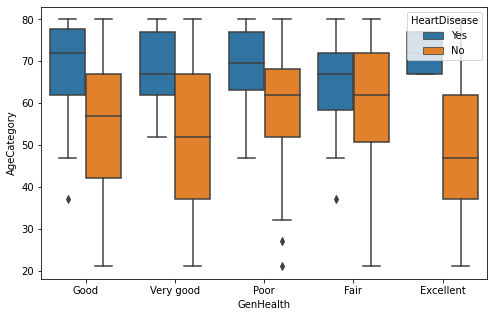

In [39]:
PLT.figure(figsize=(8,5))
SB.boxplot(x=X['GenHealth'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">KidneyDisease :</font>

In [40]:
X['KidneyDisease'].describe()

count     992
unique      2
top        No
freq      952
Name: KidneyDisease, dtype: object

In [41]:
X['KidneyDisease'].isnull().sum()

0

In [42]:
X['KidneyDisease'].value_counts()

No     952
Yes     40
Name: KidneyDisease, dtype: int64

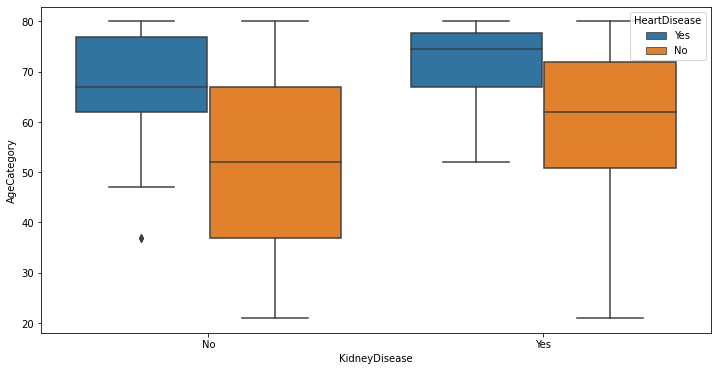

In [43]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['KidneyDisease'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">MentalHealth :</font>

In [44]:
X['MentalHealth'].describe()

count    992.000000
mean       4.061492
std        8.198179
min        0.000000
25%        0.000000
50%        0.000000
75%        3.250000
max       30.000000
Name: MentalHealth, dtype: float64

In [45]:
X['MentalHealth'].isna().sum()

0

In [46]:
X['MentalHealth'].value_counts().sort_index()

0.0     640
1.0      27
2.0      41
3.0      36
4.0      15
5.0      41
6.0       8
7.0      14
8.0       3
10.0     41
12.0      4
14.0      6
15.0     28
16.0      1
18.0      1
20.0     16
21.0      2
25.0      2
28.0      4
29.0      3
30.0     59
Name: MentalHealth, dtype: int64

<AxesSubplot:>

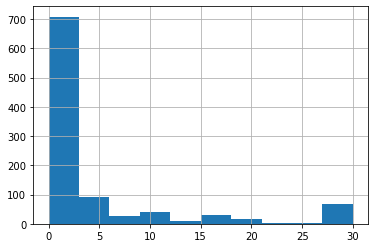

In [47]:
X['MentalHealth'].hist()

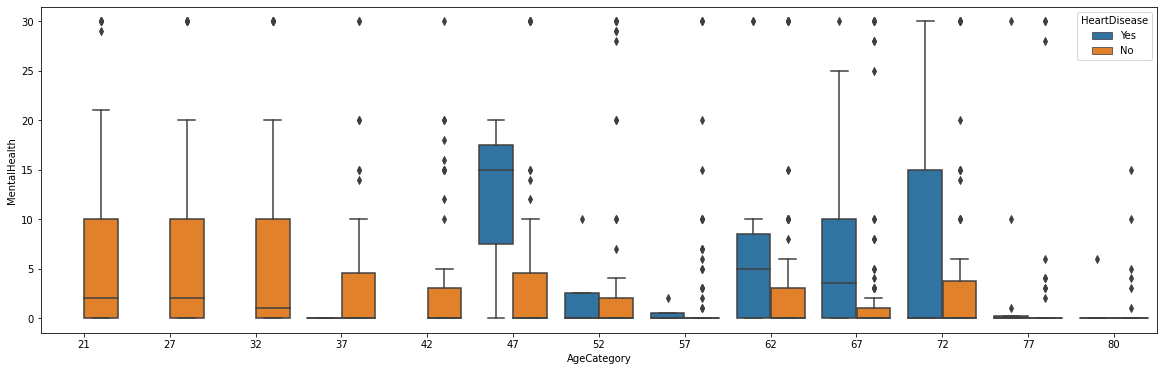

In [48]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['MentalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalActivity :</font>

In [49]:
X['PhysicalActivity'].describe()

count     992
unique      2
top       Yes
freq      797
Name: PhysicalActivity, dtype: object

In [50]:
X['PhysicalActivity'].isna().sum()

0

In [51]:
X['PhysicalActivity'].value_counts().sort_index()

No     195
Yes    797
Name: PhysicalActivity, dtype: int64

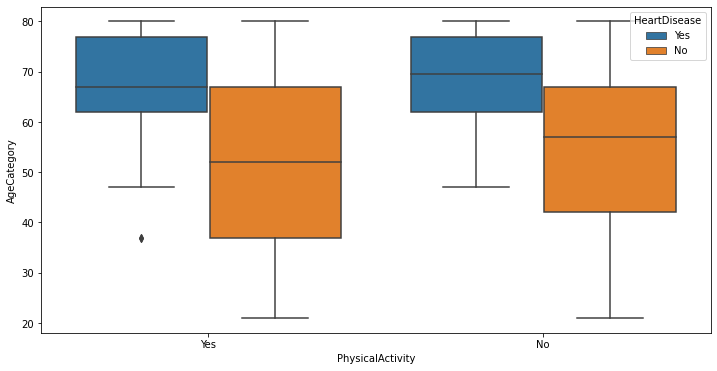

In [52]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['PhysicalActivity'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">PhysicalHealth :</font>

In [53]:
X['PhysicalHealth'].describe()

count    992.000000
mean       3.166331
std        7.711731
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       30.000000
Name: PhysicalHealth, dtype: float64

In [54]:
X['PhysicalHealth'].isna().sum()

0

In [55]:
X['PhysicalHealth'].value_counts().sort_index()

0.0     709
1.0      33
2.0      42
3.0      31
4.0      16
5.0      30
6.0       5
7.0       9
8.0       2
10.0     17
12.0      4
13.0      1
14.0      8
15.0      7
18.0      1
20.0     13
21.0      1
25.0      5
28.0      2
30.0     56
Name: PhysicalHealth, dtype: int64

<AxesSubplot:>

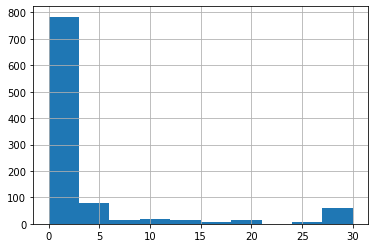

In [56]:
X['PhysicalHealth'].hist()

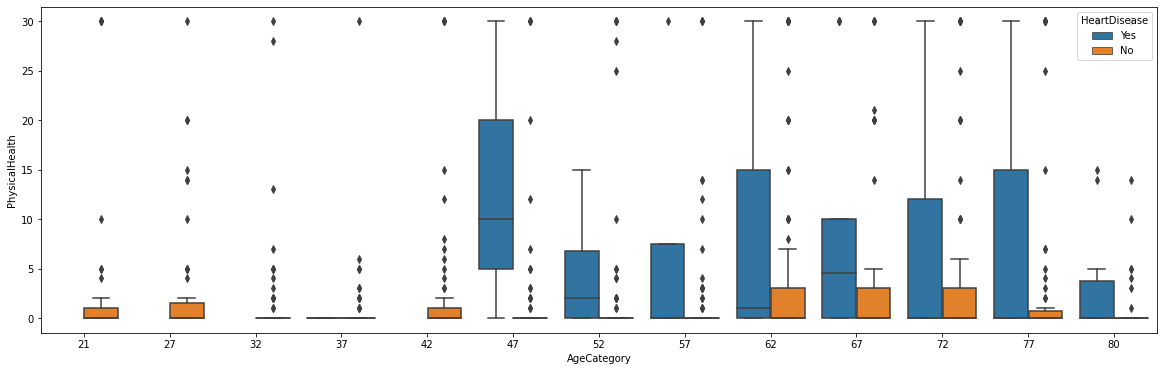

In [57]:
PLT.figure(figsize=(20,6))
SB.boxplot(y=X['PhysicalHealth'],x=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Race :</font>

In [58]:
X['Race'].describe()

count       992
unique        6
top       White
freq        753
Name: Race, dtype: object

In [59]:
X['Race'].isnull().sum()

0

In [60]:
X['Race'].value_counts()

White                             753
Hispanic                           89
Black                              79
Other                              32
Asian                              20
American Indian/Alaskan Native     19
Name: Race, dtype: int64

# <font color="Brown">Race :</font>

In [61]:
X['Sex'].describe()

count        992
unique         2
top       Female
freq         519
Name: Sex, dtype: object

In [62]:
X['Sex'].isnull().sum()

0

In [63]:
X['Sex'].value_counts()

Female    519
Male      473
Name: Sex, dtype: int64

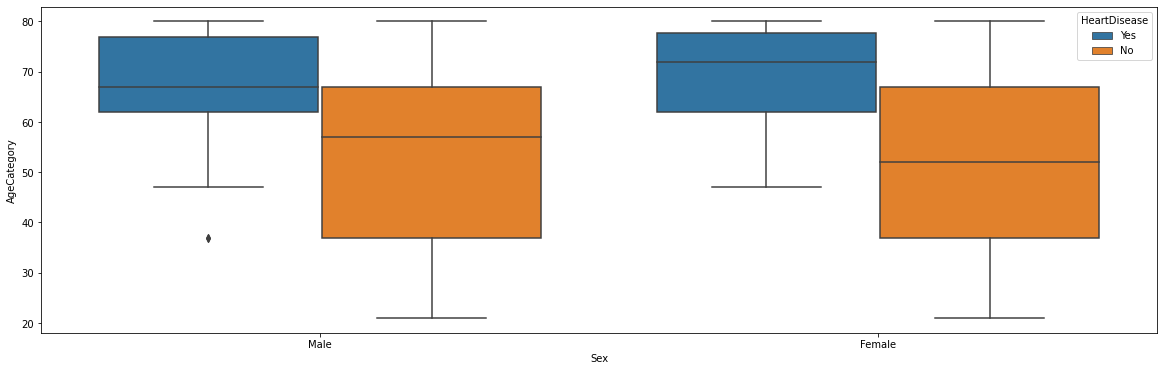

In [64]:
PLT.figure(figsize=(20,6))
SB.boxplot(x=X['Sex'],y=X['AgeCategory'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Sex :</font>

In [65]:
X['Sex'].describe()

count        992
unique         2
top       Female
freq         519
Name: Sex, dtype: object

In [66]:
X['Sex'].isnull().sum()

0

In [67]:
X['Sex'].value_counts()

Female    519
Male      473
Name: Sex, dtype: int64

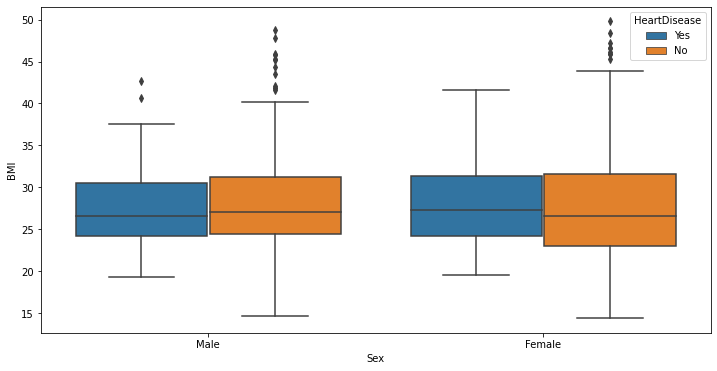

In [68]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Sex'],y=X['BMI'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">SkinCancer :</font>

In [69]:
X['SkinCancer'].describe()

count     992
unique      2
top        No
freq      904
Name: SkinCancer, dtype: object

In [70]:
X['SkinCancer'].isnull().sum()

0

In [71]:
X['SkinCancer'].value_counts()

No     904
Yes     88
Name: SkinCancer, dtype: int64

# <font color="Brown">SkinCancer :</font>

In [72]:
X['SkinCancer'].describe()

count     992
unique      2
top        No
freq      904
Name: SkinCancer, dtype: object

In [73]:
X['SkinCancer'].isnull().sum()

0

In [74]:
X['SkinCancer'].value_counts()

No     904
Yes     88
Name: SkinCancer, dtype: int64

# <font color="Brown">SleepTime :</font>

In [75]:
X['SleepTime'].describe()

count    992.000000
mean       7.139113
std        1.488199
min        1.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       18.000000
Name: SleepTime, dtype: float64

In [76]:
X['SleepTime'].isna().sum()

0

<AxesSubplot:>

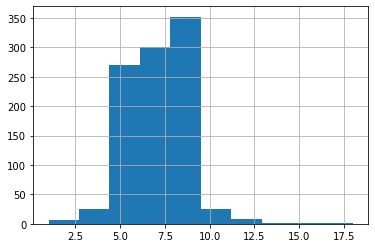

In [77]:
X['SleepTime'].hist()

In [78]:
X = X.drop(X[X['SleepTime']>16]['SleepTime'].index,axis=0)

<AxesSubplot:>

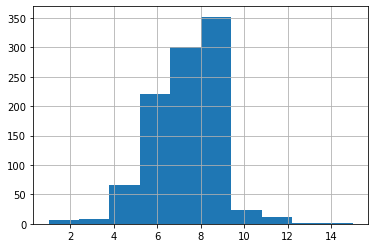

In [79]:
X['SleepTime'].hist()

# <font color="Brown">Smoking :</font>

In [80]:
X['Smoking'].describe()

count     990
unique      2
top        No
freq      578
Name: Smoking, dtype: object

In [81]:
X['Smoking'].isnull().sum()

0

In [82]:
X['Smoking'].value_counts()

No     578
Yes    412
Name: Smoking, dtype: int64

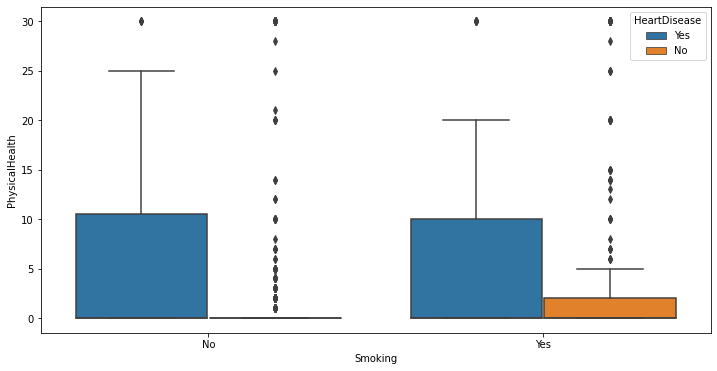

In [83]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

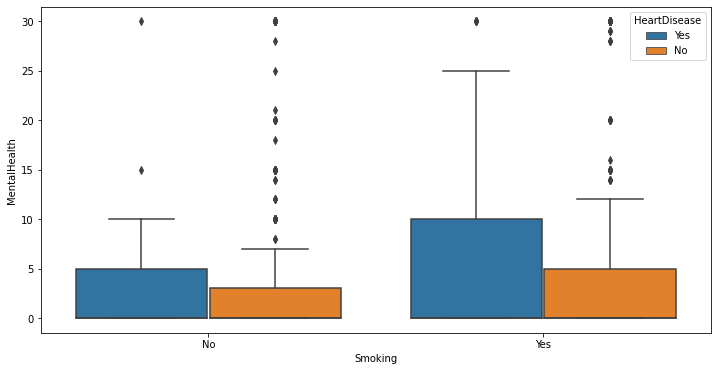

In [84]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Smoking'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Brown">Stroke :</font>

In [85]:
X['Stroke'].describe()

count     990
unique      2
top        No
freq      955
Name: Stroke, dtype: object

In [86]:
X['Stroke'].isnull().sum()

0

In [87]:
X['Stroke'].value_counts()

No     955
Yes     35
Name: Stroke, dtype: int64

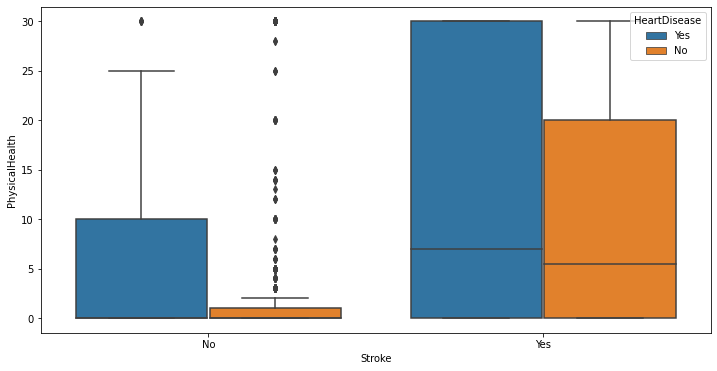

In [88]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['PhysicalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

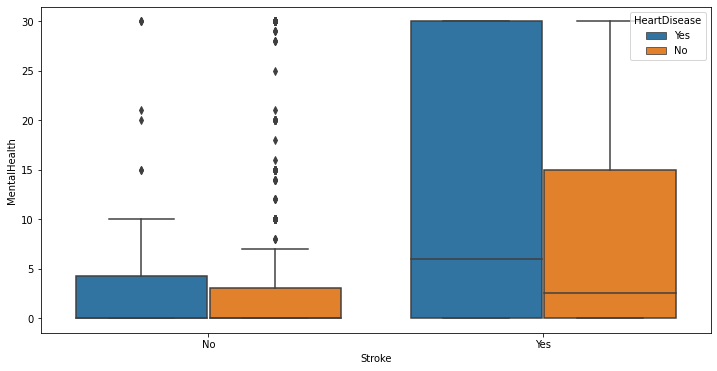

In [89]:
PLT.figure(figsize=(12,6))
SB.boxplot(x=X['Stroke'],y=X['MentalHealth'], hue=Y).legend(loc='upper right',title='HeartDisease')

# <font color="Green">One Hot Encode Categorical Label :</font>

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def OHC_transformer_single_column(DF,columns):
    
    for column_name in columns:
        label_encoder = LabelEncoder()
        encoded = label_encoder.fit_transform(DF[column_name])
        labels =pd.Series(label_encoder.classes_)

        clmt = ColumnTransformer([(column_name,OneHotEncoder(),[0])], remainder='passthrough')
        clmt_fited_data = clmt.fit_transform(DF[[column_name]]) 
        clmt_fited_data = clmt_fited_data if type(clmt_fited_data)== np.ndarray else clmt_fited_data.toarray()  
        NDF = pd.DataFrame(clmt_fited_data,columns=[f'{column_name}_{x}' for x in labels])
        
        merged = DF.merge(NDF, left_index=True,right_index=True)
        merged = merged.drop(columns=[column_name])
        DF = merged
    return DF

In [91]:
X_OHC = OHC_transformer_single_column(X,CatCols) 
Y = DF.iloc[X_OHC.index]['HeartDisease']
Y_label_encoder = LabelEncoder()
Y_OHC = Y_label_encoder.fit_transform(Y)

In [109]:
NDF = pd.concat([X,Y],axis=1)
NDF_OHC = pd.concat([X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease'])],axis=1)

# <font color="Green">Imbalance Data  :</font>

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

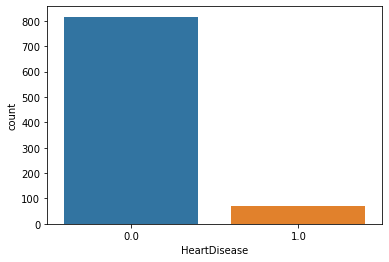

In [110]:
SB.countplot('HeartDisease',data=NDF_OHC)

In [147]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

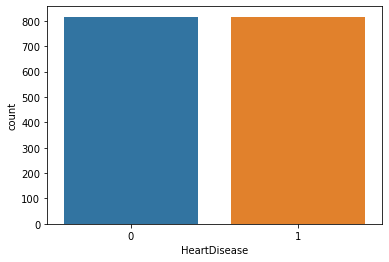

In [150]:
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_OHC,pd.DataFrame(Y_OHC,columns=['HeartDisease']))
DF_smote = pd.concat([X_smote,Y_smote],axis=1)
SB.countplot('HeartDisease',data=DF_smote)

In [92]:
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


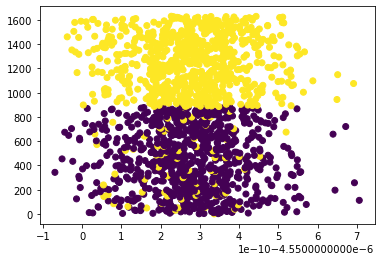

In [157]:
ica = TSNE(n_components=2,perplexity=6000)
XICA = ica.fit_transform(DF_smote.iloc[:,:-1])
PLT.scatter(XICA[:,-1],range(0,len(XICA)),c=DF_smote.iloc[:,-1])